온라인 강의에서의 feature는 지역이었는데

과제에서는 food를 feature로해서 PCA 하는것을 시켰다. 




In [48]:
import scipy.io
import IPython.display as ipd
import librosa as rs
import numpy as np
import matplotlib.pyplot as plt

In [49]:
x,sr = rs.load("sample.wav",sr=16000)
print(x.shape)

(71566,)


In [50]:
ipd.Audio(x,rate = 16000)

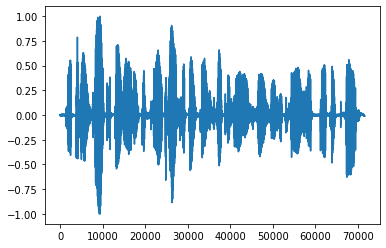

In [51]:
plt.figure()
plt.plot(x)

In [52]:
sz_seg = 256
n_seg = x.shape[0]//sz_seg

X = np.reshape(x[:n_seg*sz_seg],(n_seg,sz_seg))
print(X.shape)

(279, 256)


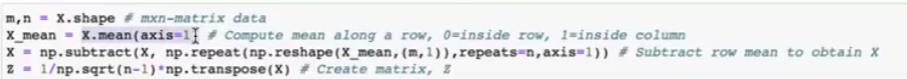

In [53]:
m,n = X.shape # m x n matrix
# normalization
mean_x = X.mean(axis=1)
X = np.subtract(X, np.repeat(np.reshape(mean_x,(m,1)),repeats=n, axis=1))
Z = 1/np.sqrt(n-1)*np.transpose(X)
print(mean_x.shape)

(279,)


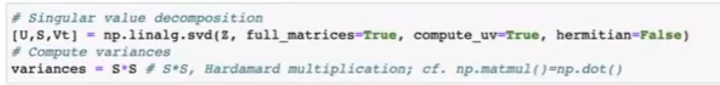

U : (256, 256),  S : (256,), Vt : (279, 279)
(256,)


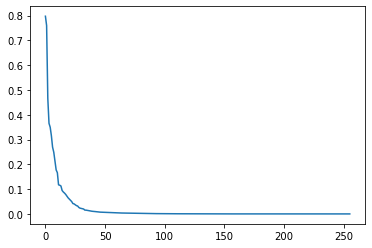

In [54]:
[U,S,Vt] = np.linalg.svd(Z,full_matrices=True, compute_uv=True,hermitian=False)
print("U : {},  S : {}, Vt : {}".format(U.shape,S.shape,Vt.shape))

# Hadamard product
Var= S*S
print(Var.shape)

plt.figure()
plt.plot(Var)

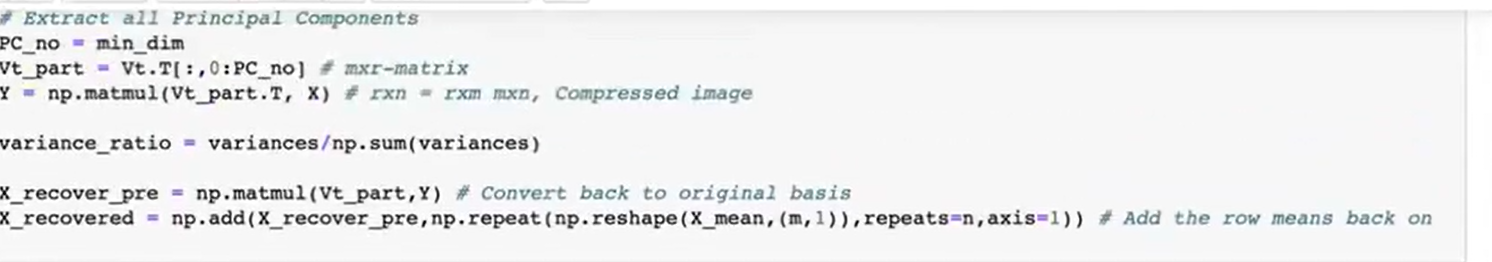

In [56]:
PC_no = 200 # r 

Vt_part = Vt.T[:,0:PC_no]

print("Vt' : {} | x2 : {}".format(Vt_part.T.shape,X.shape))

Y = np.matmul(Vt_part.T, X) # rxn = rxm * mxn
print(Y.shape)
ratio = m/(2*PC_no+1)
print("Compression Ratio : {}".format(ratio))

# recover

rec_1 = np.matmul(Vt_part,Y)
# to original shape
recovered = np.add(rec_1,np.repeat(np.reshape(mean_x,(m,1)),repeats=n,axis=1))
print(recovered.shape)
recovered = np.reshape(recovered,(n_seg*sz_seg))
print(recovered.shape)

ipd.Audio(recovered,rate = 16000)

Vt' : (200, 279) | x2 : (279, 256)
(200, 256)
Compression Ratio : 0.6957605985037406
(279, 256)
(71424,)
